# README
Introductory information to be found here.

This notebook will explain the problem and show an example solution.

All markdown comments will be found in the cell above the cell it references.

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import the particleController module that is used to complete all sorts of operations. 

In [16]:
import Generation.particleController as pc
cont = pc.particleController()

Let's generate detectors. It's important to generate these before particles because the number of barcodes generated relies on the number of detectors. In this scenario I created 8 detectors with radii 1000-8000 with increments of 1000 (they are circular), and are centered at the point (0, 0)

In [17]:
for i in range(1000, 8001, 1000): cont.addDetector(i)

Next we generate 10 particles with random parameters (these may not be realistic), and print them out. The format is:
particle barcode, [x, y, z], [momentum, theta, phi], charge

In [18]:
cont.createParticles(10)
cont.printParticles()

3,[-0.0129148, 0.0028115, 0],[8457.21, 1.27962, -1.60411],1
10,[0.0162292, 0.0089783, 0],[11999.98, 0.94487, -2.16094],1
4,[-0.0270692, -0.0205536, 0],[8645.06, 3.26291, 1.43813],1
9,[0.0048454, -0.0250463, 0],[4479.5, 3.85664, 3.11611],-1
6,[0.0218838, 0.0165285, 0],[11498.44, 0.74334, 1.64454],1
5,[0.0290523, 0.0115806, 0],[4084.62, 1.63486, -3.5369],0
2,[0.0030066, -0.0053348, 0],[12343.3, 2.85204, -2.40135],0
1,[-0.0144649, -0.0156073, 0],[5279.52, 1.08829, -2.42476],1
7,[0.0017214, -0.024741, 0],[5882.8, 3.18717, -0.14155],-1
8,[0.0283843, -0.0291737, 0],[10880.31, 1.31512, 1.534],-1


Now we will approximate hits with the detectors given the particle's parameters.

In [19]:
cont.computeallHits()
cont.printallHits()

3,59,[-92.349910309643505, 995.72661612804166]
3,32,[-302.51274133002585, 1976.9891353603825]
3,14,[-630.14425057026983, 2933.0731704942568]
3,73,[-1074.8743964638622, 3852.8749047725969]
3,9,[-1636.3123707770578, 4724.6673772067761]
3,8,[-2314.0370391752504, 5535.8136331821215]
3,52,[-3107.5844989384609, 6272.3933695167261]
3,42,[-4016.431010680687, 6918.6907675110415]
10,64,[521.39371909667318, -853.31623076473795]
10,63,[970.62880775547717, -1748.6794210361095]
10,4,[1344.7904865447392, -2681.7044108735709]
10,13,[1640.8967361973716, -3647.9388565513018]
10,54,[1855.8852629485718, -4642.8105594316812]
10,46,[1986.5819481093968, -5661.5803591793956]
10,74,[2029.6646718505674, -6699.2881203782945]
10,18,[1981.6206169058996, -7750.6889842551091]
4,58,[189.35357950579333, -981.90896824926881]
4,17,[492.06041156296936, -1938.5243231315108]
4,51,[906.73546652651771, -2859.690681479894]
4,53,[1431.9758768519216, -3734.8955926657673]
4,3,[2066.303658189363, -4553.0637149235299]
4,77,[2808.1

Let's have a look at these hits. The green dot in the center is the point (0, 0)

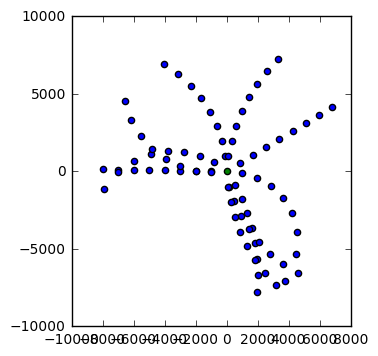

In [20]:
cont.plotParticle_hits()

Here we can see the hits are all intersections with the detectors. 

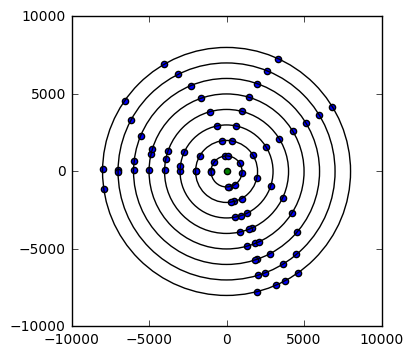

In [21]:
cont.plotDetectors()

Here we can see that the origins of particles are not exactly (0, 0). This is (probably) not knowledge that will be useful for predicting path but a fun fact.

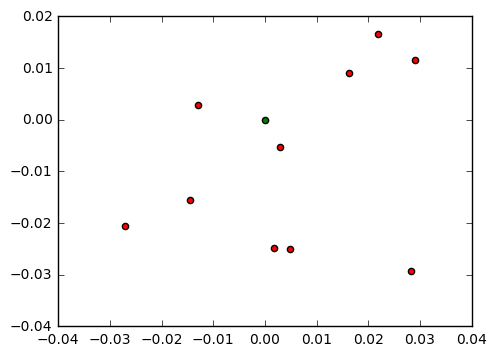

In [22]:
cont.clearPlot()
cont.plotParticle_origins()

The next two commands show the particle's path drawn out.

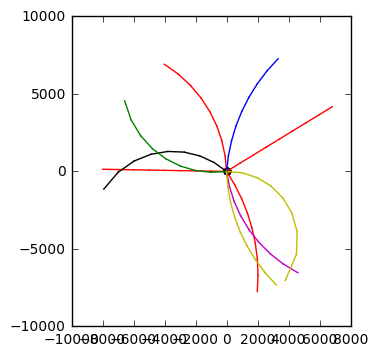

In [23]:
cont.plotParticle_joins()

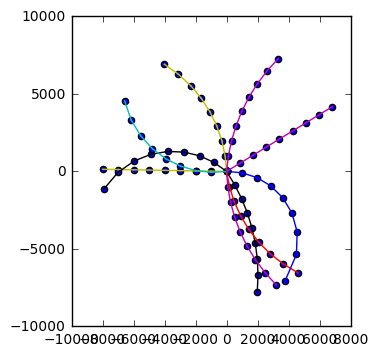

In [24]:
cont.plotParticle_hits()

Let's look at how fast particles are generated! I believe the generation of these barcodes scales linearly so in order to generate a lot of particles all you need is time.

In [25]:
cont.clearController()
import time
start = time.time()
cont.createParticles(10000) #generate 10000 particles
print "10000 particles generated in", time.time() - start, "seconds"

for i in range(1000, 8001, 1000): cont.addDetector(i) #need to add detectors for the hit to collide with

start = time.time()
cont.computeallHits() #comupte all hits (8*)
print "hits for 10000 particles and 8 detectors generated in", time.time() - start, "seconds"

TypeError: unsupported operand type(s) for >>: 'builtin_function_or_method' and 'OutStream'

# An example of prediction
A very rudimentary algorithm that does x y z. Here you will see a potential input being read, and hits being assigned to particles. Explain what input looks like yada yada. Reading from an input file formatted as follows:
hit barcode, particle barcode (? if not hit intersecting with first detector), [x, y] 

In [12]:
cont = pc.particleController() #could have done cont.clearController()
cont.readHits('particle_valid.csv')

Here we see what the input file looks like.

In [13]:
cont.printallHits()

1,1,[991.693005807357, 128.627299718101]
2,?,[1983.38973317544, 257.22590525498]
3,?,[2975.08646040515, 385.824510773915]
4,?,[3966.78318760027, 514.423116288365]
5,?,[4958.47991478155, 643.021721801019]
6,?,[5950.17664195591, 771.620327312777]
7,?,[6941.87336912632, 900.218932824022]
8,?,[7933.57009629425, 1028.81753833495]
9,2,[901.263860164669, -433.270647933923]
10,?,[1833.68636743255, -798.495025590013]
11,?,[2793.52636407337, -1093.71406374197]
12,?,[3776.99580771176, -1316.92925722217]
13,?,[4780.22523508478, -1466.0991446211]
14,?,[5799.23275497126, -1539.12294949704]
15,?,[6829.88939567812, -1533.82229831348]
16,?,[7867.87943654002, -1447.92029202945]
17,3,[710.75751198932, -703.437103905354]
18,?,[1421.54161578383, -1406.84733876661]
19,?,[2132.32571940904, -2110.25757346034]
20,?,[2843.10982299193, -2813.66780811218]
21,?,[3553.89392655789, -3517.07804274726]
22,?,[4264.67803011539, -4220.48827737397]
23,?,[4975.46213366805, -4923.89851199589]
24,?,[5686.24623721769, -5627.3

Note: cannot yet plot join because we don't know what hits belong to what particle!

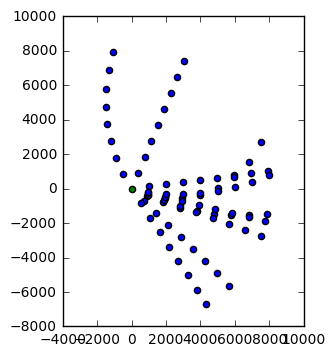

In [14]:
cont.plotallHits()

In [15]:
for i in range(1000, 8001, 1000): cont.addDetector(i) #add detectors

Next we use a very bad algorithm to predict which hits belong to which particle.

In [16]:
cont.compHitdet()
cont.predictParticles()

Let's print out the solution we got formatted as follows:
particle barcode, [all hit barcodes for hits belonging to particle]

In [17]:
cont.printSoln()

1 , [1, 2, 3, 4, 5, 6, 7, 8]
2 , [9, 10, 11, 44, 45, 46, 47, 48]
3 , [17, 18, 19, 20, 21, 22, 23, 24]
4 , [25, 42, 43, 44, 45, 46, 47, 48]
5 , [33, 34, 35, 36, 37, 38, 39, 40]
6 , [41, 42, 43, 44, 45, 46, 47, 48]
7 , [49, 50, 51, 52, 53, 54, 55, 56]
8 , [57, 58, 59, 60, 61, 62, 63, 64]
9 , [65, 66, 67, 68, 69, 70, 71, 72]
10 , [73, 74, 75, 28, 77, 78, 79, 80]


And let's see what our prediction looks like!

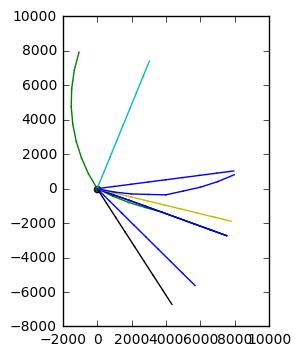

In [18]:
cont.clearPlot()
cont.plotParticle_joins()

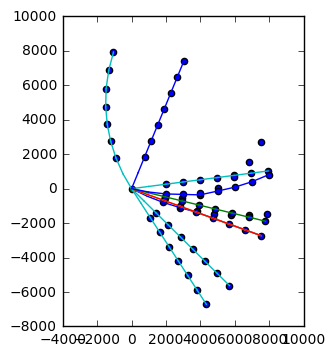

In [19]:
cont.plotallHits()

Doesn't look too good but doesn't look completely wrong. Let's score our solution now!

In [20]:
cont.moveHits()
cont.scoreSoln('particle_valid_soln.txt')

You predicted 83.75 '%' of hits correctly.
